# HR Analytics Project- Understanding the Attrition in HR

## Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR¶

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers

# Importing useful Libraries:

In [1]:
# Import data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer


#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#configure
%matplotlib inline

# Data Collection and Information:

In [2]:
#reading the dataset
hr_data=pd.read_csv("/Users/nidhinathkatiyar/Downloads/ibm-hr-analytics-employee-attrition-performance.zip")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

## Hence this is a Binary Classification problem.

In [3]:
# Shape of our data
hr_data.shape

(1470, 35)

## we have total 1470 columns and 35 rows.

# Exploratory Data Analysis ( EDA)

In [4]:
#dataset information
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## OBSERVATION

1. there are no null values.
2. some columns have object datatype which means we have to encode.

In [5]:
#Checking whether any null data is present
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## NO NULL VALUE OR MISSING VALUE.

In [6]:
# Now we will check the statistical description:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## observation:

1.The counts of all the columns are same which means there are no missing values present in the data.

2.The mean is more than the median(50%) in most of the columns which means they are skewed to right. The min age of the employee is 18 and max is 60 and most of the employees are in between 36. In few columns the median(50%) is more than the mean which means they are skewes to left.

3.By summarising the data above we can infer that DailyRate has a huge outliers from the maximum of 1499 which is quite far from the 75% percentile. These differences we can also be seen in Age, DistanceFromHome, HourlyRate, MonthlyIncome, TotalWorkingYears, YearsAtCompany and many other. Some of the columns have huge difference in mean and the standard deviation.

In [7]:
# Now let us check whether any duplicate data is present if yes we will delete it
hr_data.drop_duplicates(inplace=True)

In [8]:
# Now check the shape
hr_data.shape

(1470, 35)

## there is no duplicate data is available

In [9]:
#Now check the unique values in our data set
hr_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

So, there are 18 year and standard hour have only one value, so that does not have any effect in our data, so we can remove them

## Let us take a look at the columns to select and drop any unwanted columsn like ID

In [10]:
hr_data.drop('EmployeeCount', axis=1, inplace=True)
hr_data.drop('EmployeeNumber', axis=1, inplace=True)
hr_data.drop(['Over18','StandardHours'],axis=1,inplace=True)

In [11]:
# check the value count in target column
hr_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Data is imbalanced by class we have 1233 people who have not left the company and 237 people who have left the company.we will deal with it using SMOTE.

In [12]:
# checking  weather any spaces where added in between our dataset

hr_data.loc[hr_data['Attrition']==" "]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


* Attrition tab has no space.

# Data Visualization:

In [13]:
# Now checking for numerical columns
numerical_col=[]
for i in hr_data.dtypes.index:
    if hr_data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
# checking for categorical columns
categorical_col=[]
for i in hr_data.dtypes.index:
    if hr_data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


## Univariate Analysis

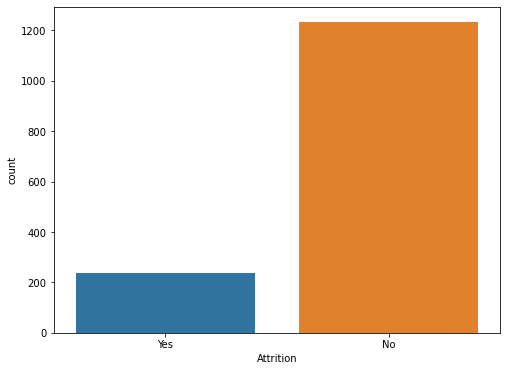

In [15]:
# Univariate Analysis in catogorical coloumns
plt.figure(figsize=(8,6))
sns.countplot(hr_data["Attrition"])
plt.show()

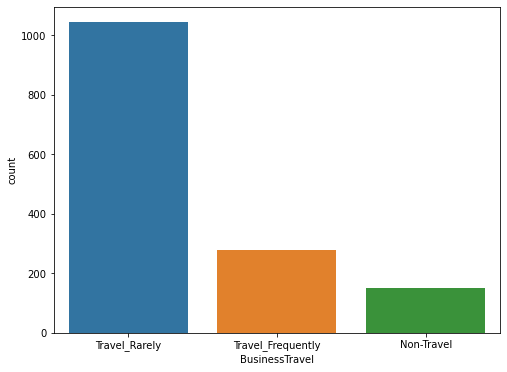

In [16]:
#BusinessTravel
plt.figure(figsize=(8,6))
sns.countplot(hr_data['BusinessTravel'])
plt.show()

* There are 3 catagories available in this feild, Travel_rarely have high numbers, compared to travel frequently Business Travel and Non Travels

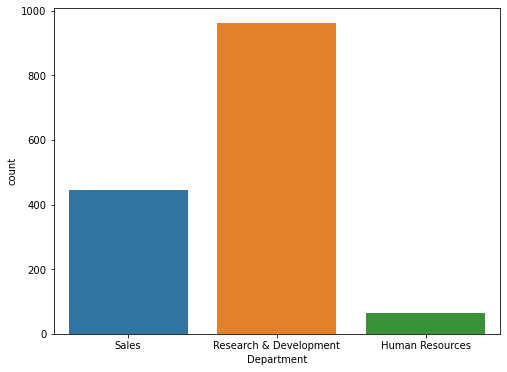

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(hr_data['Department'])
plt.show()

## * Department have three catogories in which Research and Development department have highest numbers followed by Sales department and then Human resources department 

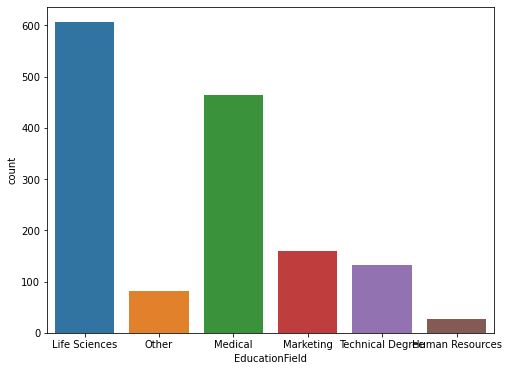

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(hr_data['EducationField'])
plt.show()

* life science are highest in number where as human resources are lowest in number.

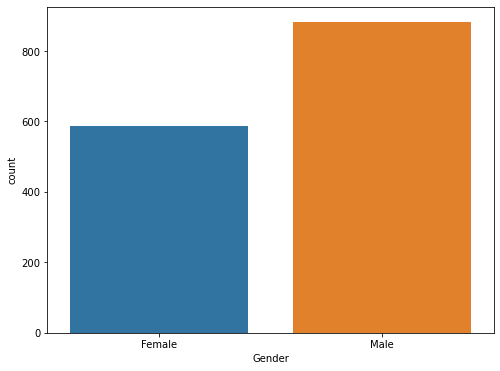

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(hr_data['Gender'])
plt.show()

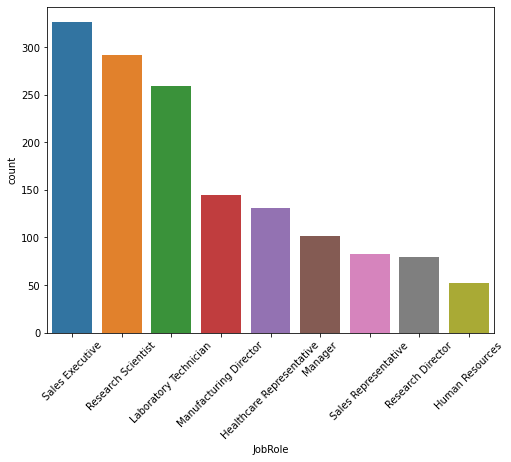

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(hr_data['JobRole'])
plt.xticks(rotation=45)

plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


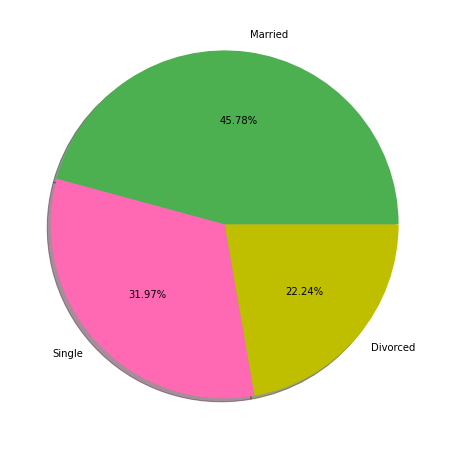

In [21]:
#Visualize the count of marital status of the employees
print(hr_data["MaritalStatus"].value_counts())
labels='Married','Single','Divorced '
colors = ["#4CAF50", "hotpink", "y"]
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(hr_data['MaritalStatus'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

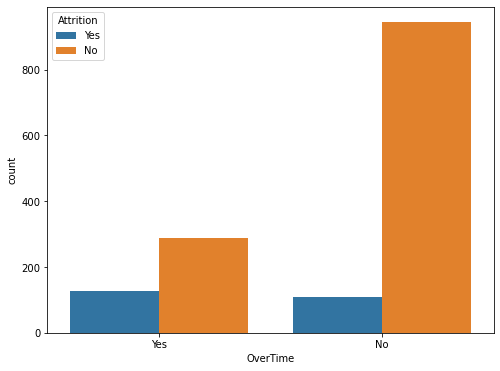

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(hr_data['OverTime'],hue=hr_data['Attrition'])
plt.show()

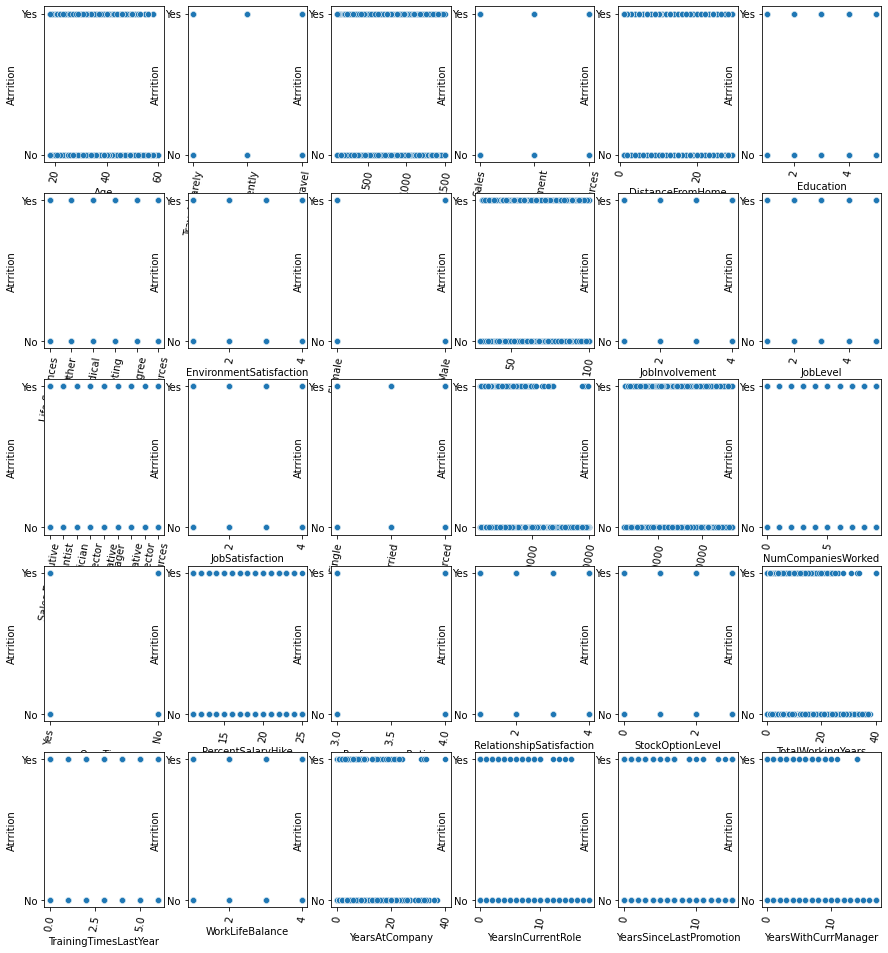

In [23]:
#Now let us plot relation between Label and our features
x=hr_data.drop('Attrition',axis=1)
y=hr_data['Attrition']
plt.figure(figsize=(15,20))
p=1
for i in x:
    if p<31:
        plt.subplot(6,6,p)
        sns.scatterplot(x=x[i],y=y)
        plt.xticks(rotation=80)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Atrrition',fontsize=10)
    p+=1
plt.show()

# Bivariate Analysis:

## * Comparision between age and Attrition:

Text(0.5, 1.0, 'Comparision between Attrition and Age')

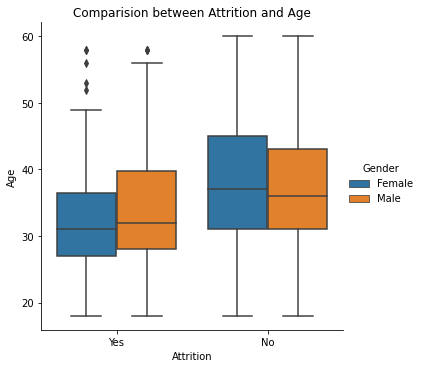

In [24]:
# Visualizing the age of the employees who left and stayed 
sns.factorplot(x='Attrition',y='Age',data=hr_data,kind="box",size=5,hue='Gender')
plt.title('Comparision between Attrition and Age')

* Female employees have less Atrrition rate, Male both are equal

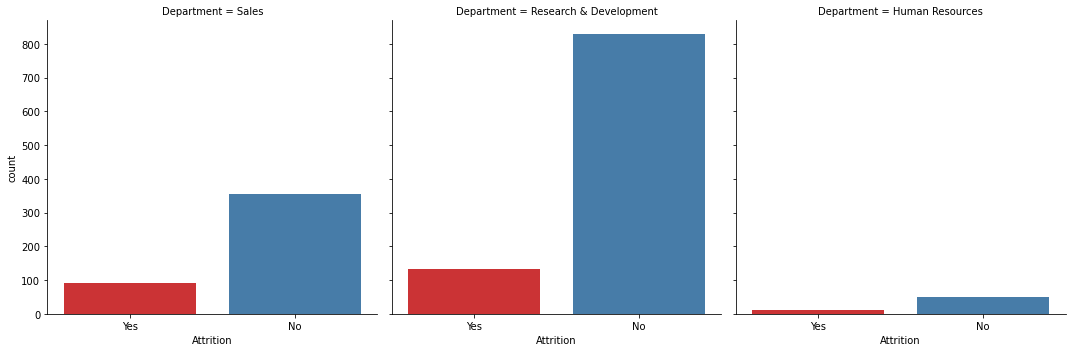

In [25]:
sns.catplot(x='Attrition',col='Department',data=hr_data,kind='count',palette="Set1")

* Hr department have high percentage of Attrition compared to other two department

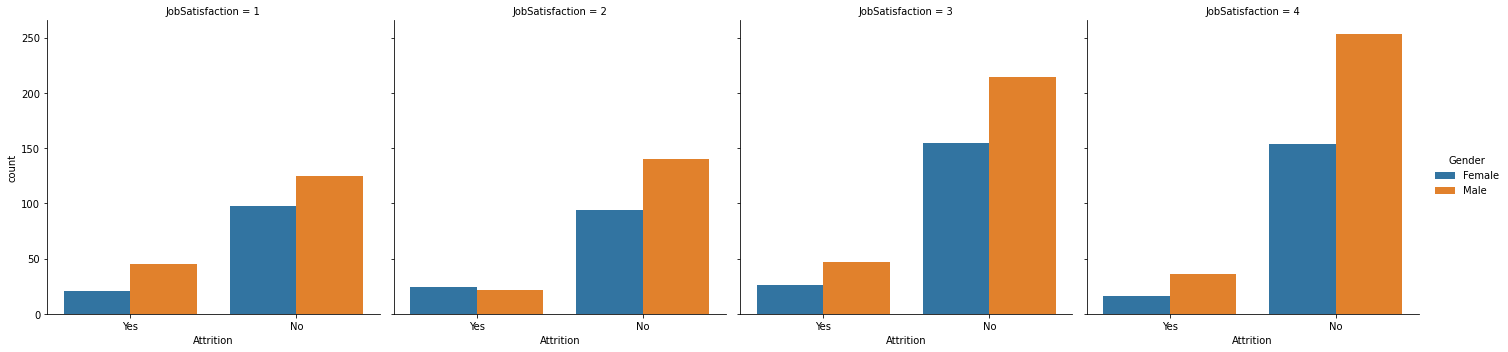

In [26]:
#Job Satisfaction
sns.factorplot(data=hr_data,kind='count',x='Attrition',col='JobSatisfaction',hue='Gender')

* This indicates an interesting trend. Note that for higher values of job satisfaction (i.e. a person is more satisfied with their job) a lower percentage of them say 'yes' which is quite clear because highly satisfied workers will avoid Attrition

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


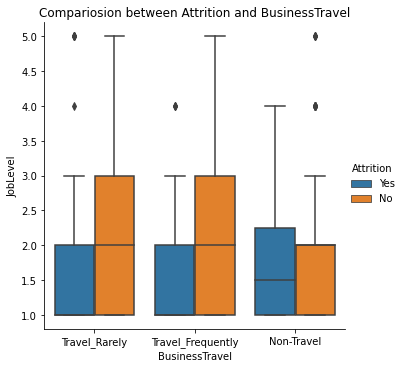

In [27]:
print(hr_data["BusinessTravel"].value_counts())
sns.catplot(x="BusinessTravel",y='JobLevel',data=hr_data,hue="Attrition",kind="box")
plt.title("Compariosion between Attrition and BusinessTravel")
plt.show()

* Job higher level travel more and their Attrition level is low so people likes to travel. For non travelers attrition rate is high

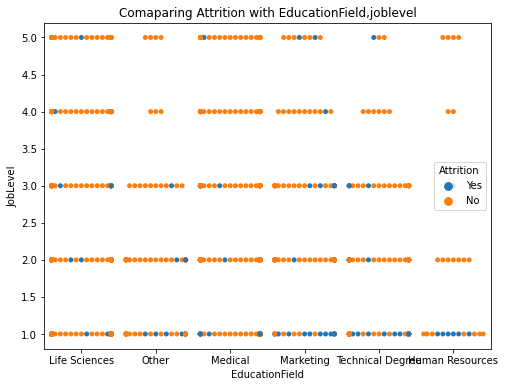

In [28]:
# Checking how the attrition perform according to the employees EducationField and joblevel
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with EducationField,joblevel")
sns.swarmplot(x='EducationField',y='JobLevel',hue='Attrition',data=hr_data)
plt.show()

* this is clear lower job level and marketing,Human resource have high rate, of attrition

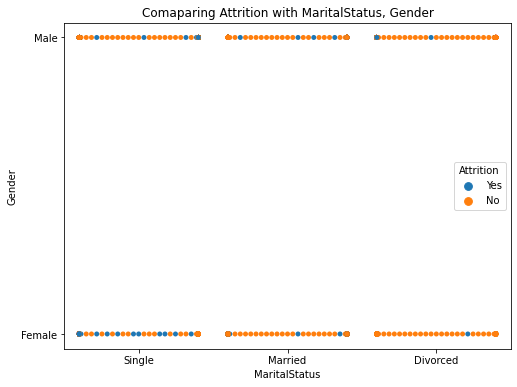

In [29]:
# Checking how the attrition perform according to the employees Maritalstatus
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with MaritalStatus, Gender")
sns.swarmplot(x=hr_data['MaritalStatus'],y=hr_data['Gender'],hue=hr_data["Attrition"])
plt.show()

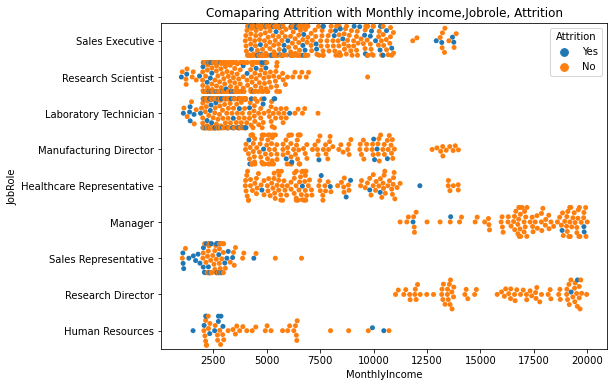

In [30]:
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Monthly income,Jobrole, Attrition")
sns.swarmplot(x=hr_data['MonthlyIncome'],y=hr_data['JobRole'],hue=hr_data["Attrition"])
plt.show()

* Lower income have high attrition rate.

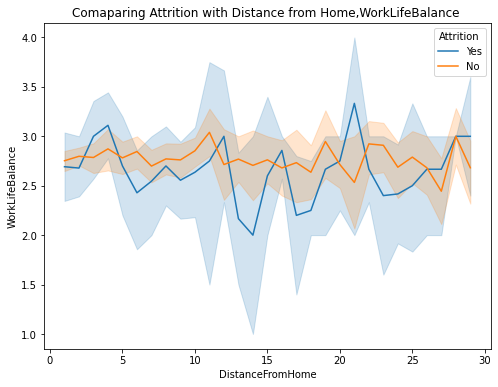

In [31]:
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Distance from Home,WorkLifeBalance ")
sns.lineplot(x=hr_data['DistanceFromHome'],y=hr_data['WorkLifeBalance'],hue=hr_data["Attrition"])
plt.show()

* As distance increases, attrition also get increases

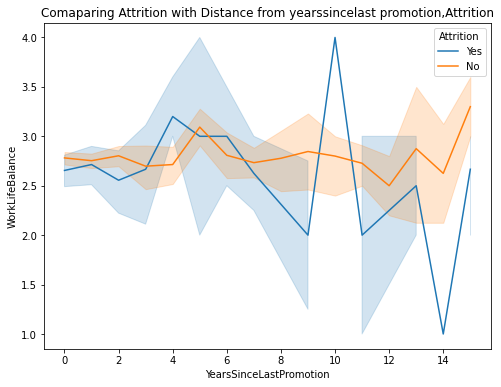

In [32]:
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Distance from yearssincelast promotion,Attrition")
sns.lineplot(x=hr_data['YearsSinceLastPromotion'],y=hr_data['WorkLifeBalance'],hue=hr_data["Attrition"])
plt.show()

* As years since promtion increases attrition level also get differs

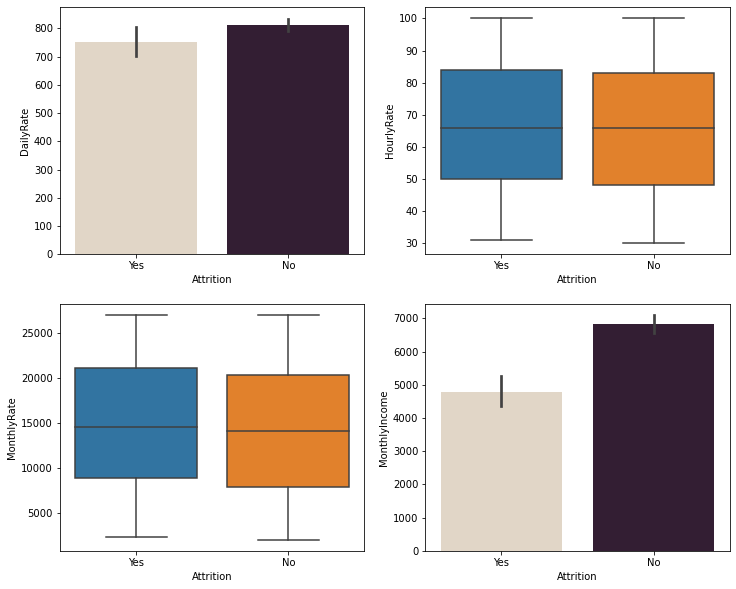

In [33]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in Dailyrate
sns.barplot(x='Attrition',y='DailyRate',ax=axes[0,0],data=hr_data,palette="ch:.25")

# Checking attrition level in hourlyrate
sns.boxplot(x='Attrition',y='HourlyRate',ax=axes[0,1],data=hr_data)

# Checking attrition level in Monthlyrate
sns.boxplot(x='Attrition',y='MonthlyRate',ax=axes[1,0],data=hr_data)

# Checking attrition level in Monthlyincome
sns.barplot(x='Attrition',y='MonthlyIncome',ax=axes[1,1],data=hr_data,palette="ch:.25")
plt.show()

1.First plot shows that the Employees working with lower daily rate wants to leave the organization compared to employees working with higher dailyrate.

2.In the second plot both Attrition and HourlyRate equal which means there is no significant difference in attrition and hourlyrate, so hourlyrate wont affect the attrition.

3.The third plot shows the MonthlyRate for "Yes" is bit higher than "No" attrition.

4.In the fourth plot, the MonthlyIncome for "No" attrition is quite high than the "Yes" attrition and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

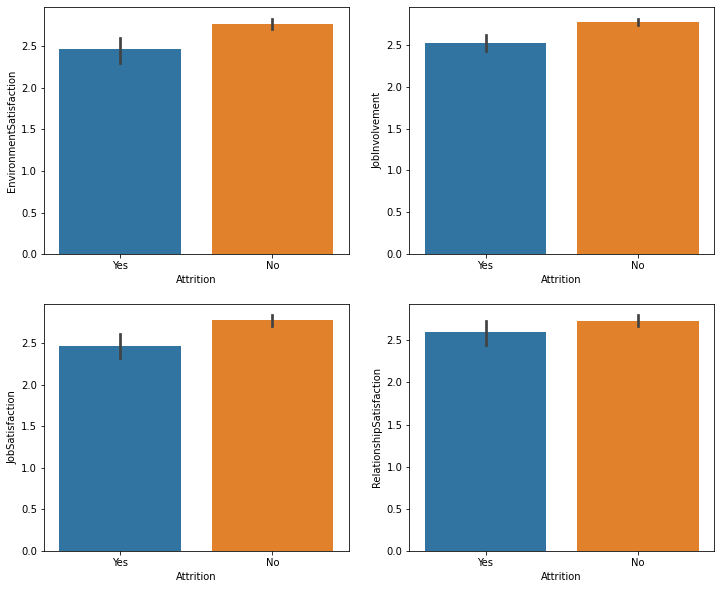

In [34]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',ax=axes[0,0],data=hr_data)

# Checking attrition level in JobInvolvement
sns.barplot(x='Attrition',y='JobInvolvement',ax=axes[0,1],data=hr_data)

# Checking attrition level in JobSatisfaction
sns.barplot(x='Attrition',y='JobSatisfaction',ax=axes[1,0],data=hr_data)

# Checking attrition level in RelationshipSatisfaction
sns.barplot(x='Attrition',y='RelationshipSatisfaction',ax=axes[1,1],data=hr_data)
plt.show()

* From this its clear all these are higly related to label and there might be chances of multicolinearity

YearsAtCompany, TotalWorkingYears, YearsInCurrentRole and YearsSinceLastPromotion

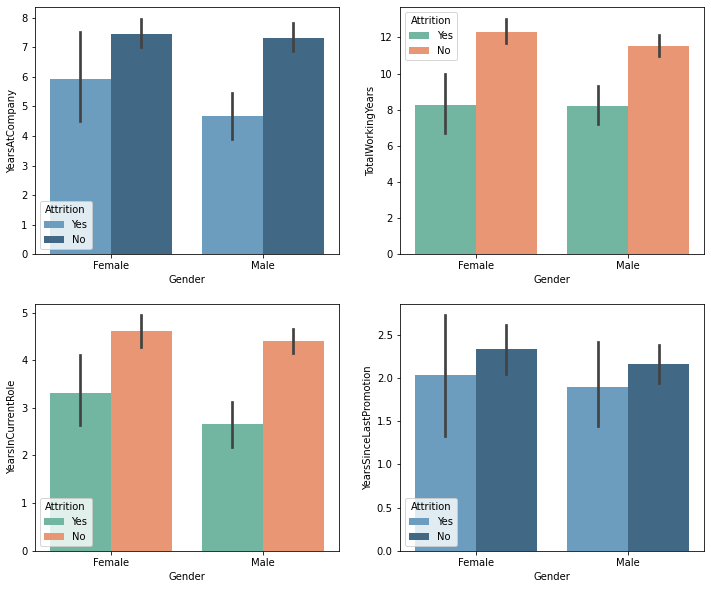

In [35]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in YearsAtCompany
sns.barplot(x='Gender',y='YearsAtCompany',ax=axes[0,0],data=hr_data,hue='Attrition',palette="Blues_d")

# Checking attrition level in TotalWorkingYears
sns.barplot(x='Gender',y='TotalWorkingYears',ax=axes[0,1],data=hr_data,hue='Attrition',palette="Set2")

# Checking attrition level in YearsInCurrentRole
sns.barplot(x='Gender',y='YearsInCurrentRole',ax=axes[1,0],data=hr_data,hue='Attrition',palette="Set2")

# Checking attrition level in YearsSinceLastPromotion
sns.barplot(x='Gender',y='YearsSinceLastPromotion',ax=axes[1,1],data=hr_data,hue='Attrition',palette="Blues_d")
plt.show()

Female employees are spending more years at company but the "Yes" attrition for female employees are more than male.

As same as above the Total Working Years of female employees is more than the male employees and the "Yes" attrition for male and female employees are same.

Here also the female employees spending more years in the current organization compare to male employees and also they are facing attrition.

The female employees spend more years since their last promotion than male.

From the above observation we can say that the spending years of female employees is more than male and the wants to quit the organization.

3    1244
4     226
Name: PerformanceRating, dtype: int64


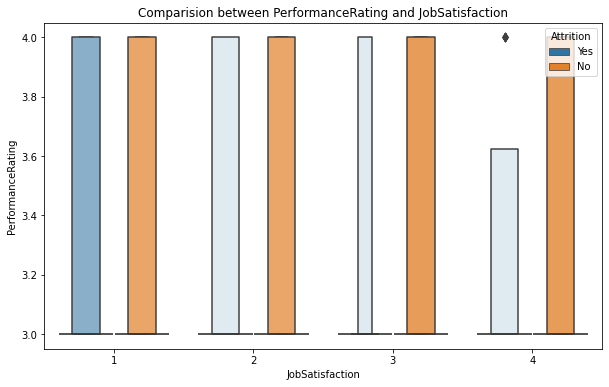

In [36]:
print(hr_data["PerformanceRating"].value_counts())
plt.figure(figsize=(10,6))
sns.boxenplot('JobSatisfaction','PerformanceRating',data=hr_data,hue='Attrition')
plt.title("Comparision between PerformanceRating and JobSatisfaction")
plt.show()

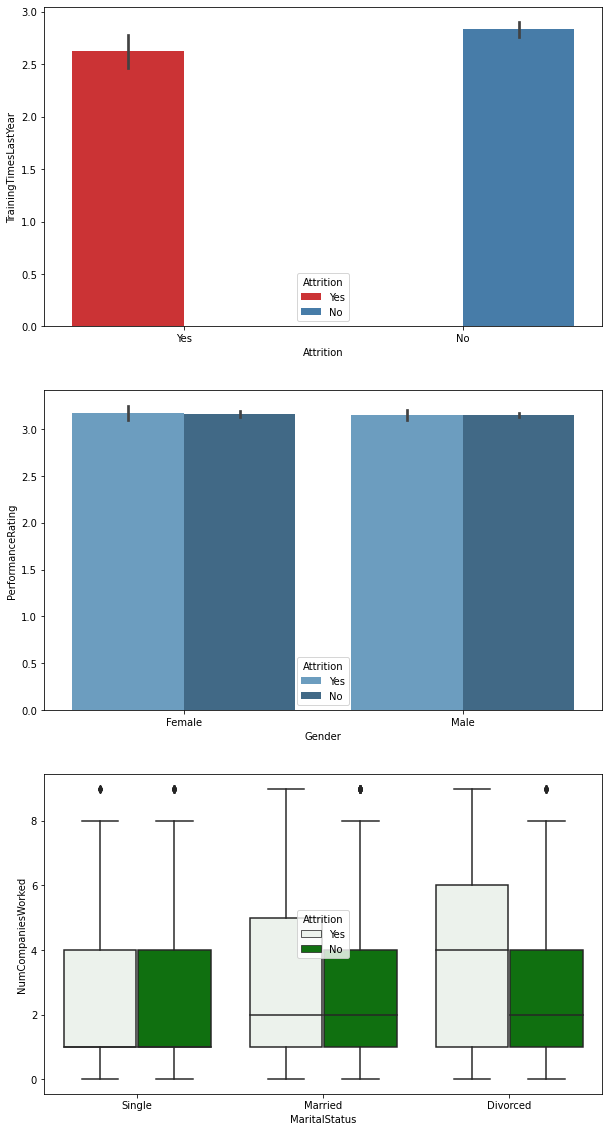

In [37]:
fig,axes=plt.subplots(3,1,figsize=(10,20))

# Checking attrition level in TrainingTimesLastYear
sns.barplot(x='Attrition',y='TrainingTimesLastYear',ax=axes[0],data=hr_data,hue='Attrition',palette="Set1")

# Checking attrition level in PerformanceRating
sns.barplot(x='Gender',y='PerformanceRating',ax=axes[1],data=hr_data,hue='Attrition',palette="Blues_d")

# Checking attrition level in NumCompaniesWorked
sns.boxplot(x='MaritalStatus',y='NumCompaniesWorked',ax=axes[2],data=hr_data,hue='Attrition',color="g")
plt.show()

# EDA Conclusion Remarks

1.The data is unbalanced by class, we have 83% who did not leave the company and 17% who left the company

2.The age group of IBM employees in this data set is between 25-45 years old

3.Attrition is more common in younger age groups and is more likely among females As expected, it is more common among single employees

4.People who leave the company have fewer opportunities to travel around the company.

5.People with very high education tend to have lower friction

From the visualization plots we can conclude that below mentioned category are having higher attrition rate:

1.Sales department among all the departments

2.Human Resources and Technical Degree in Education

3.Single’s in Marital status (Will not use this due to GDPR)

4.Male in comparison to females in Gender (Will not use this due to GDPR)

5.Employee with job satisfaction value 1

6.Job level 1 in job level

7.Life balance having value 1

8.Employee staying at distant place

9.Environment Satisfaction value 1

# Corelation between features:

In [38]:
hr_data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


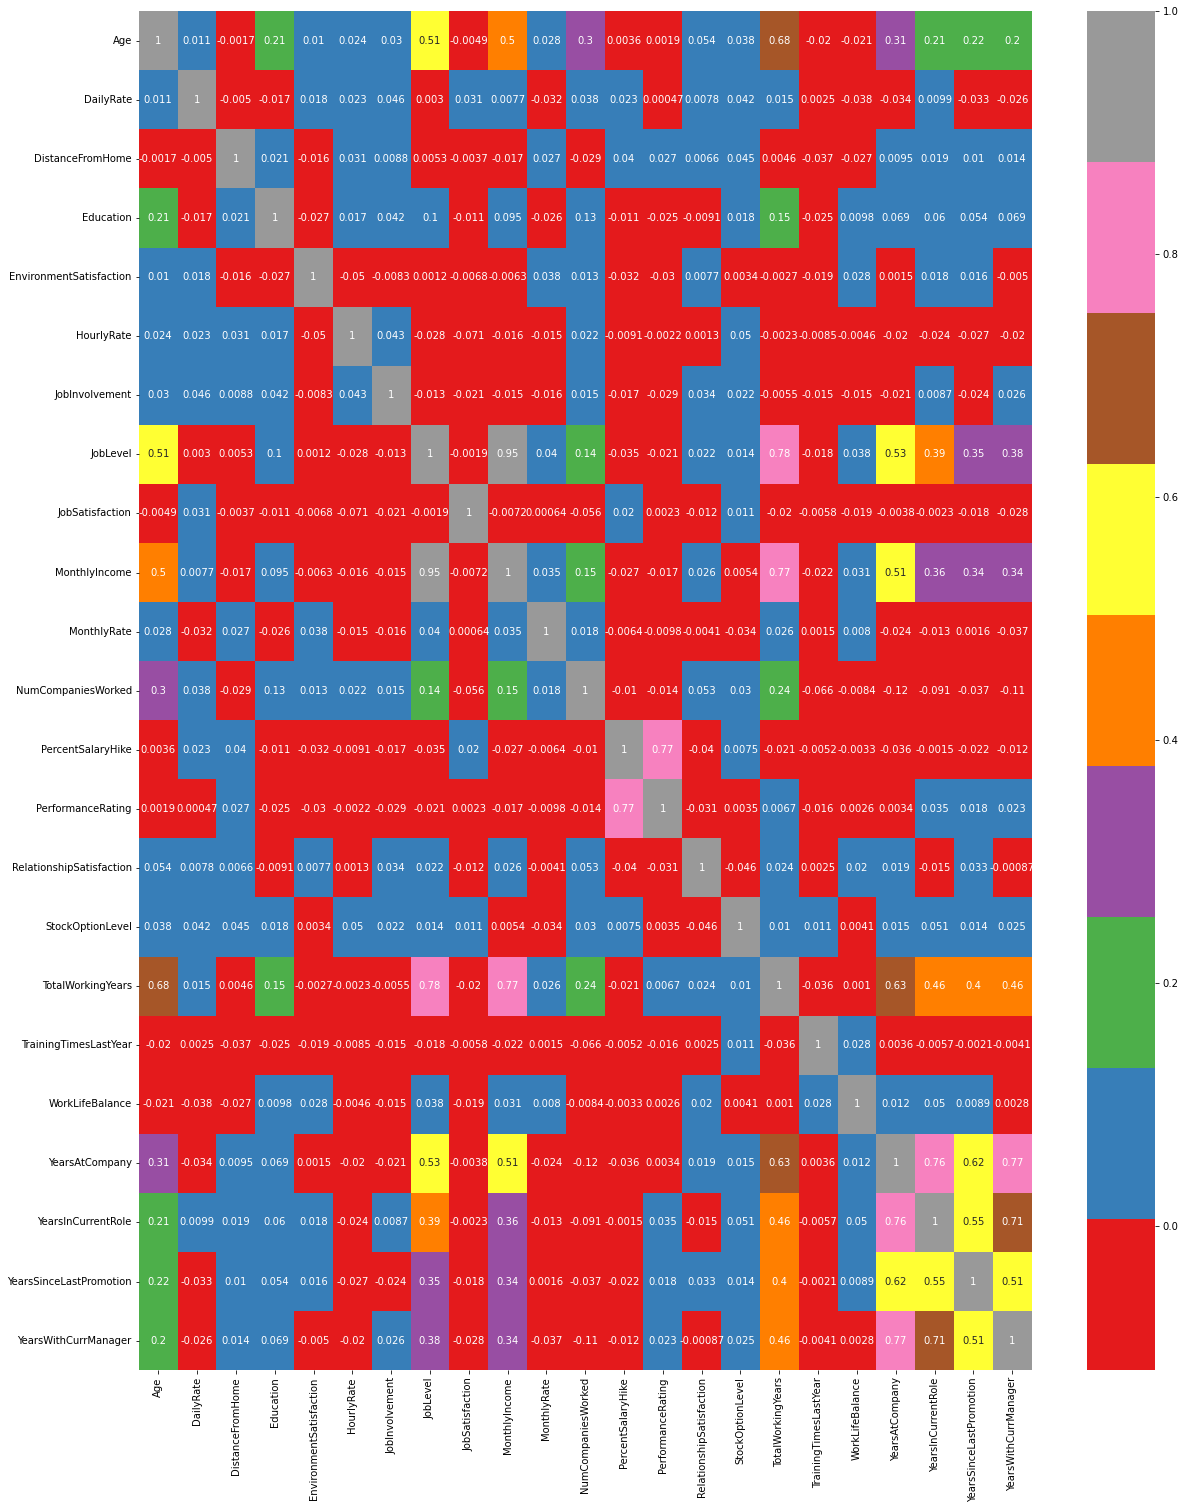

In [39]:
plt.figure(figsize=(20,25))
sns.heatmap(hr_data.corr(),annot=True,cmap='Set1')
plt.show()

# Inferences:

"JobLevel" is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

"MonthlyIncome" is very strongly related to joblevel as expected as senior employees will definately earn more.

"PerformanceRating" is highly related to PercentSalaryHike which is quite obvious.

Also note that "TotalWorkingYears" is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

"YearsWithCurrManager" is highly related to "YearsAtCompany".

"YearsAtCompany" is related to "YearsInCurrentRole".

Note: that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

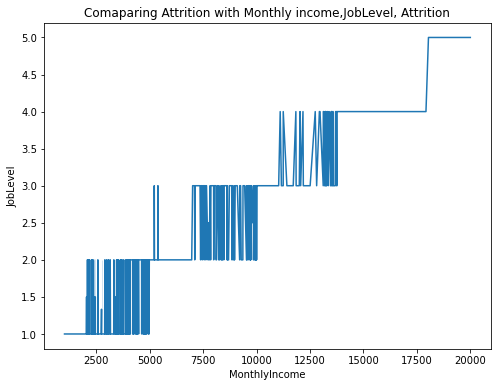

In [40]:
#let us visualize relation between monthlyincome and joblevel
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Monthly income,JobLevel, Attrition")
sns.lineplot(x=hr_data['MonthlyIncome'],y=hr_data['JobLevel'])
plt.show()

* This clearly shows that as job level increases ,salary also get increases

## checking for outliers:

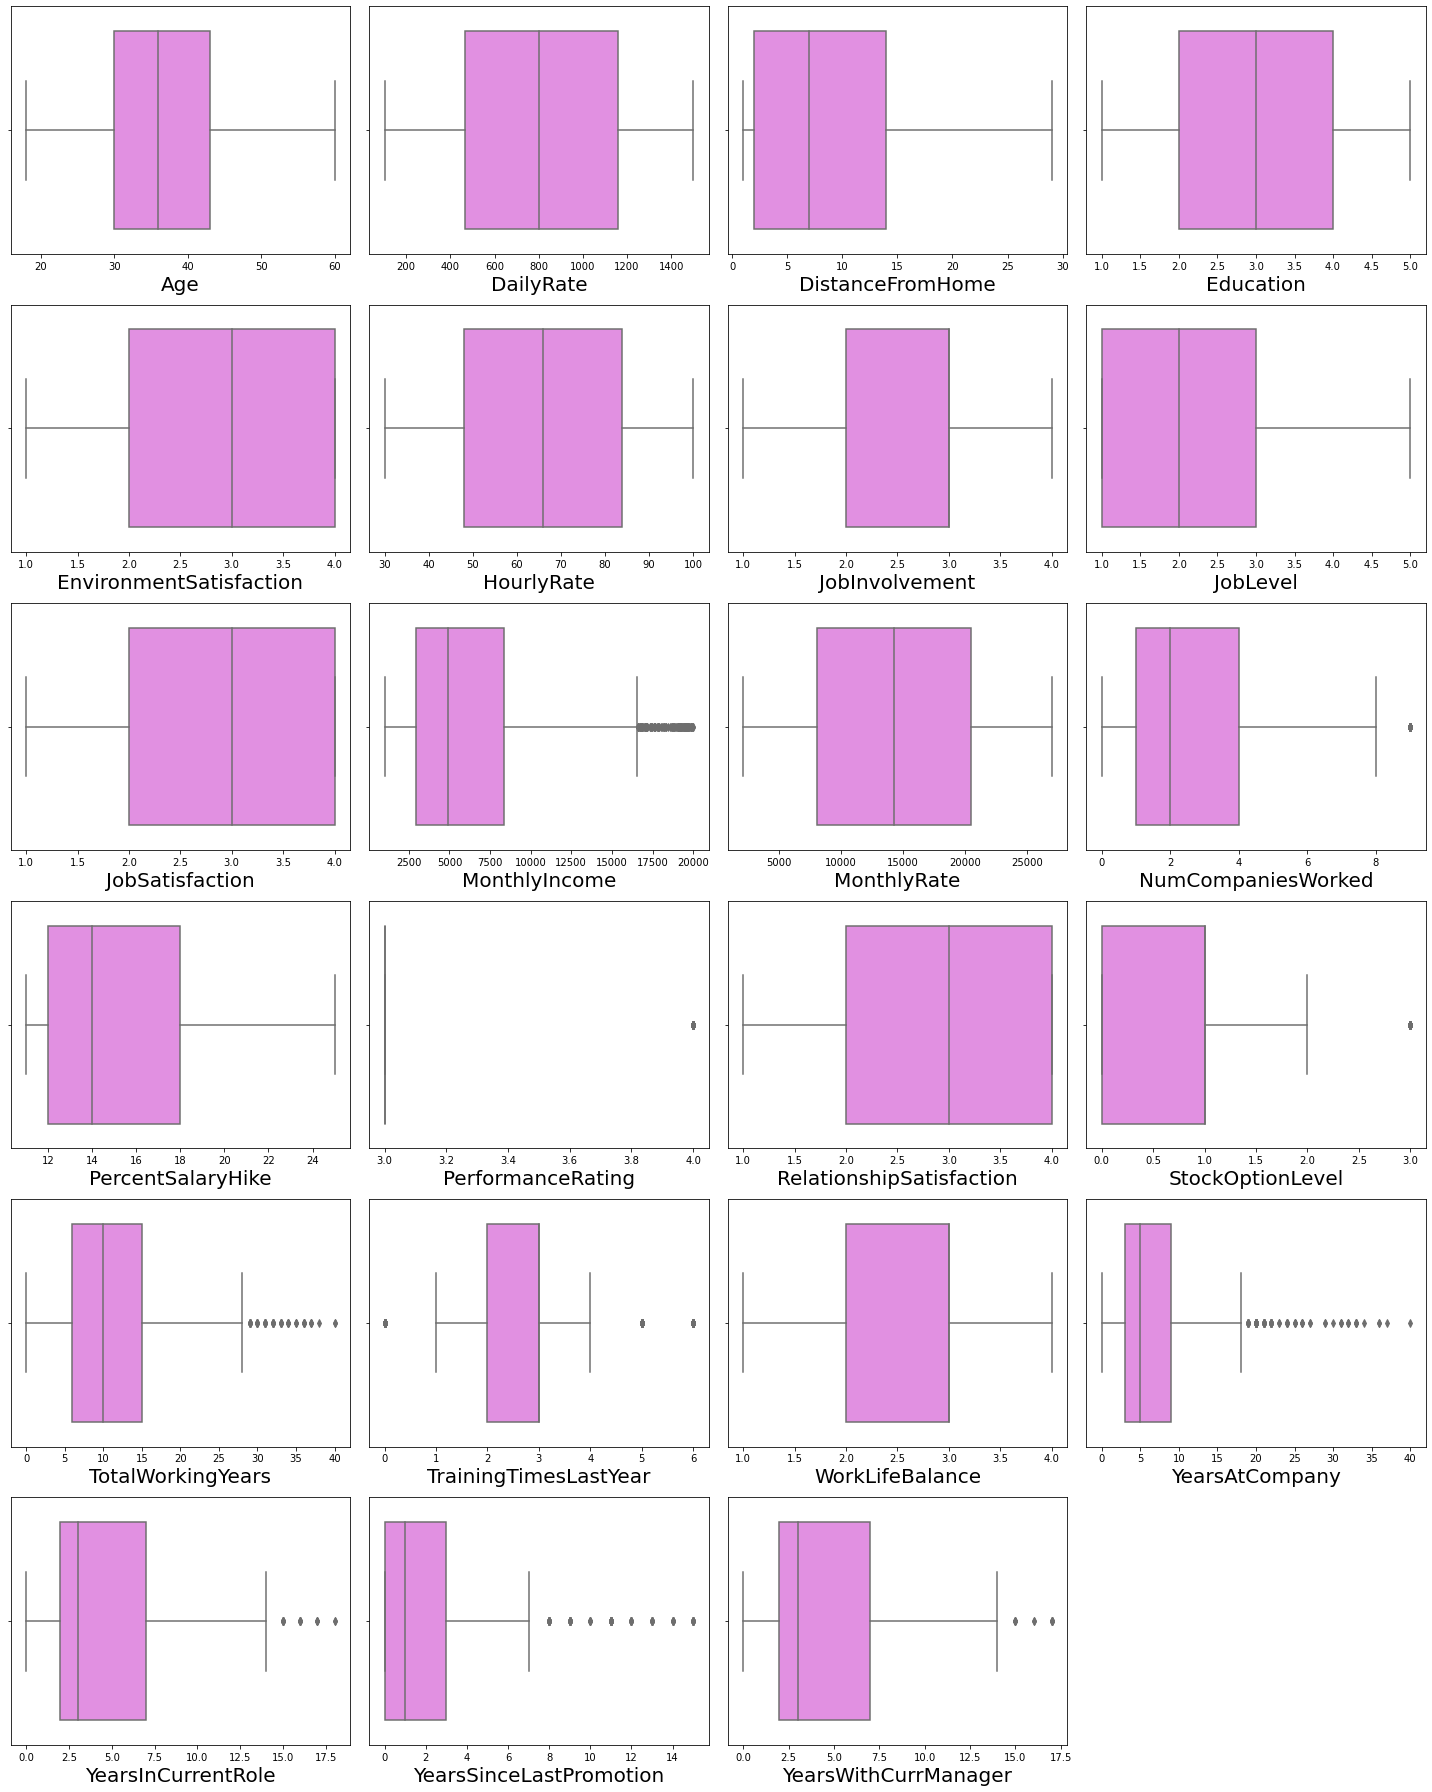

In [41]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(hr_data[column],color="violet")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers present in the columns MonthlyIncome, NumCompaniesWorked, performanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager. We will remove these outliers using either Zscore or IQR mathod in the further steps.

In [42]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Removing Outliers Using Zscore method

In [43]:
#Seperating outliers
feature_cols = hr_data[['MonthlyIncome', 'NumCompaniesWorked','PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
# import necessary library
from scipy.stats import zscore
z=np.abs(zscore(feature_cols))

z

,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...
1465,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [44]:
# Creating new dataframe removing oputliers
new_df = hr_data[(z<3).all(axis=1)] 
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


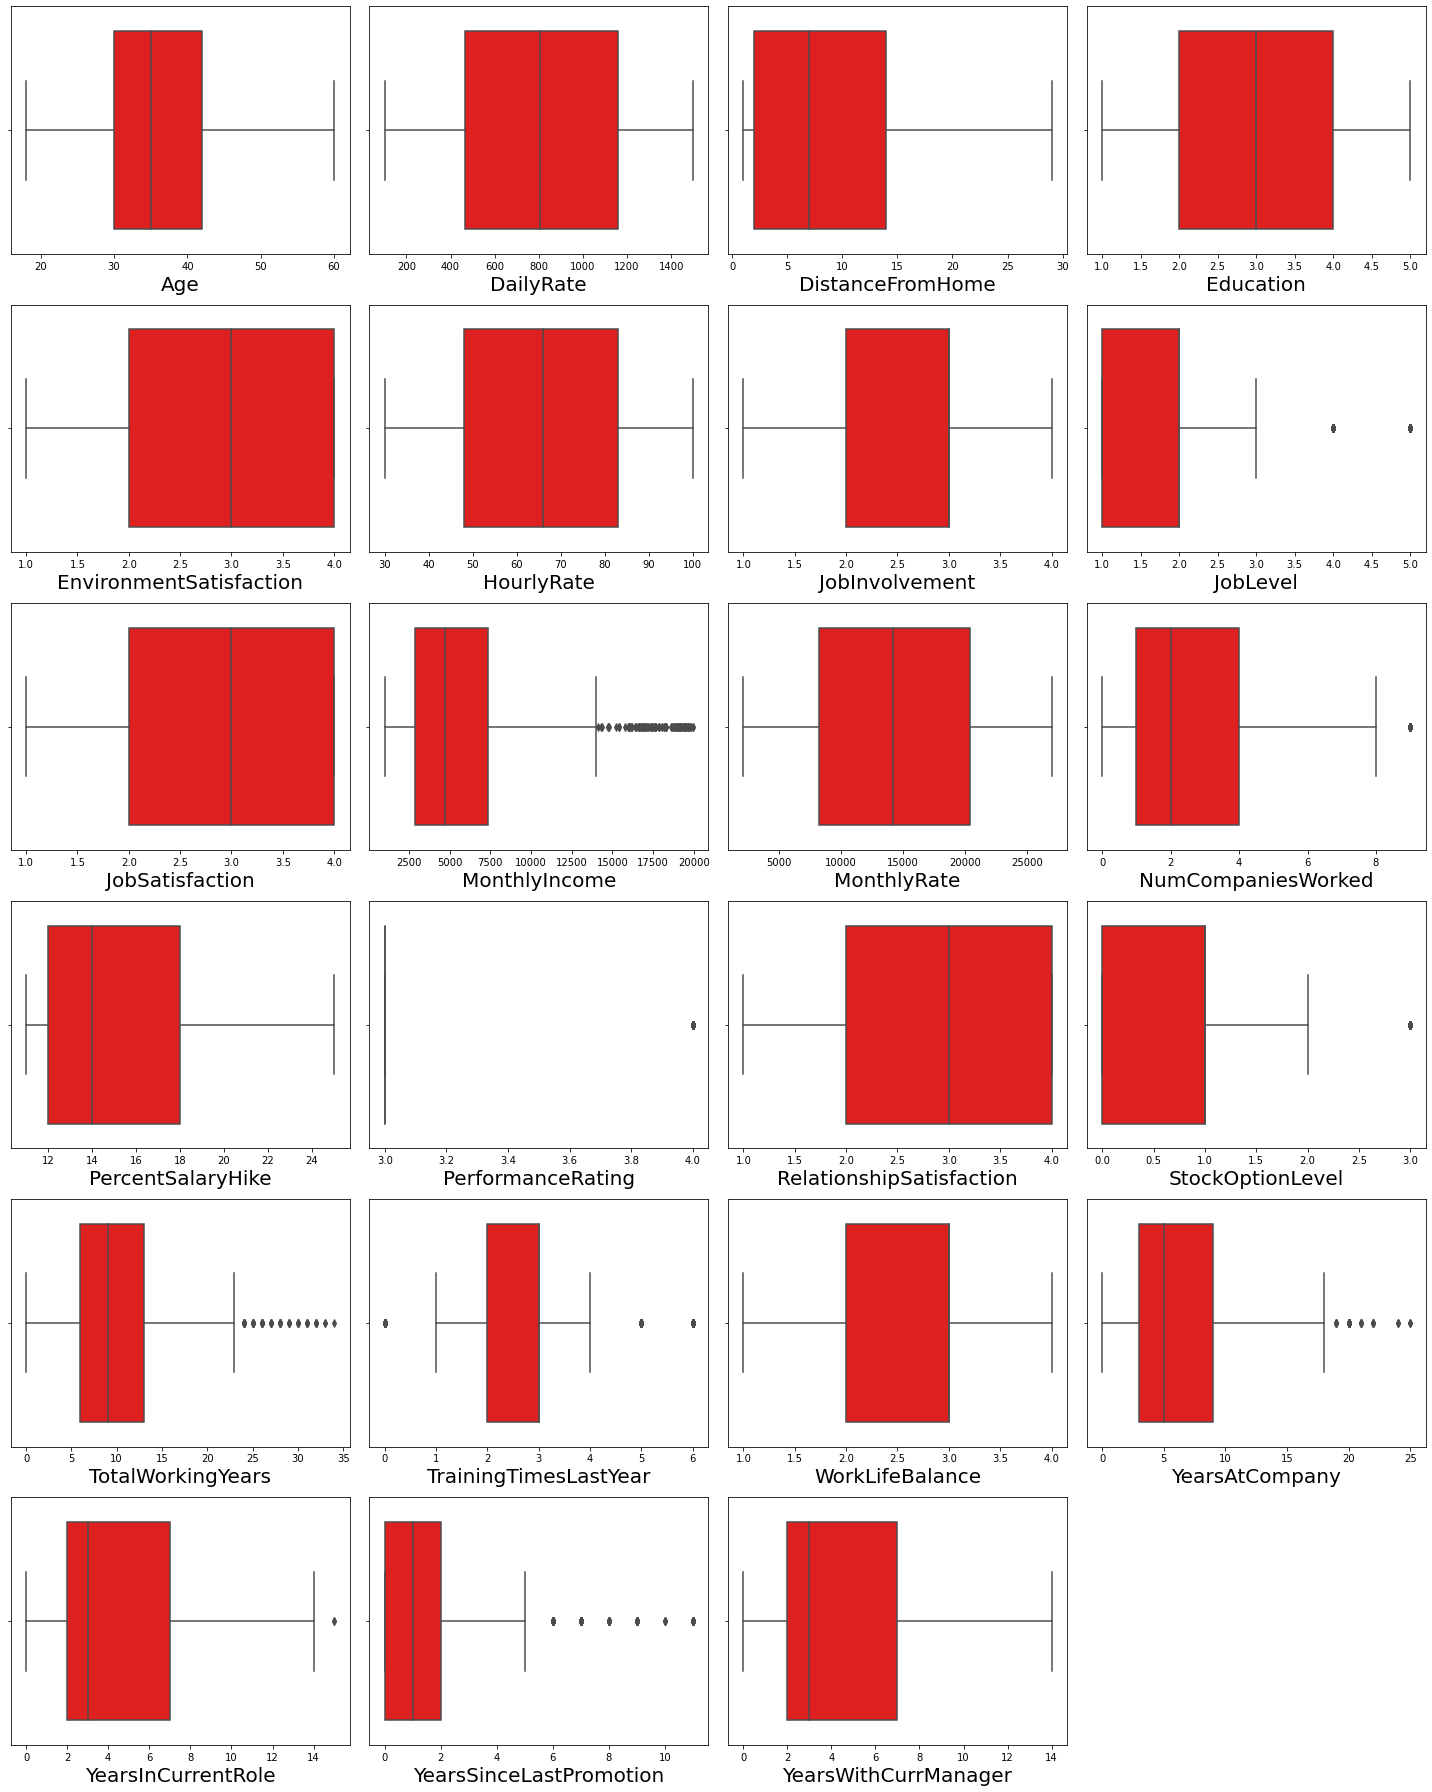

In [45]:
#letus plot again
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Checking the % of Data loss

In [46]:
hr_data.shape

(1470, 31)

In [47]:
new_df.shape

(1387, 31)

In [48]:
(1470-1387)/1470*100

5.646258503401361

## Total 5% data Loss in our data that is acceptable which is less than 10%

# 2. IQR Method

In [49]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

In [50]:
#3rd quantile
Q3=feature_cols.quantile(0.75)

In [51]:
# IQR
IQR=Q3 - Q1

iqrdf=hr_data[~((hr_data < (Q1 - 1.5 * IQR)) |(hr_data > (Q3 + 1.5 * IQR))).any(axis=1)]
iqrdf.shape

(779, 31)

In [52]:
#% of data loss
(1470-779)/1470*100

47.006802721088434

47% of data loss with iqr method that is not acceptable, So we will move forward with zscore method

# Skewness:

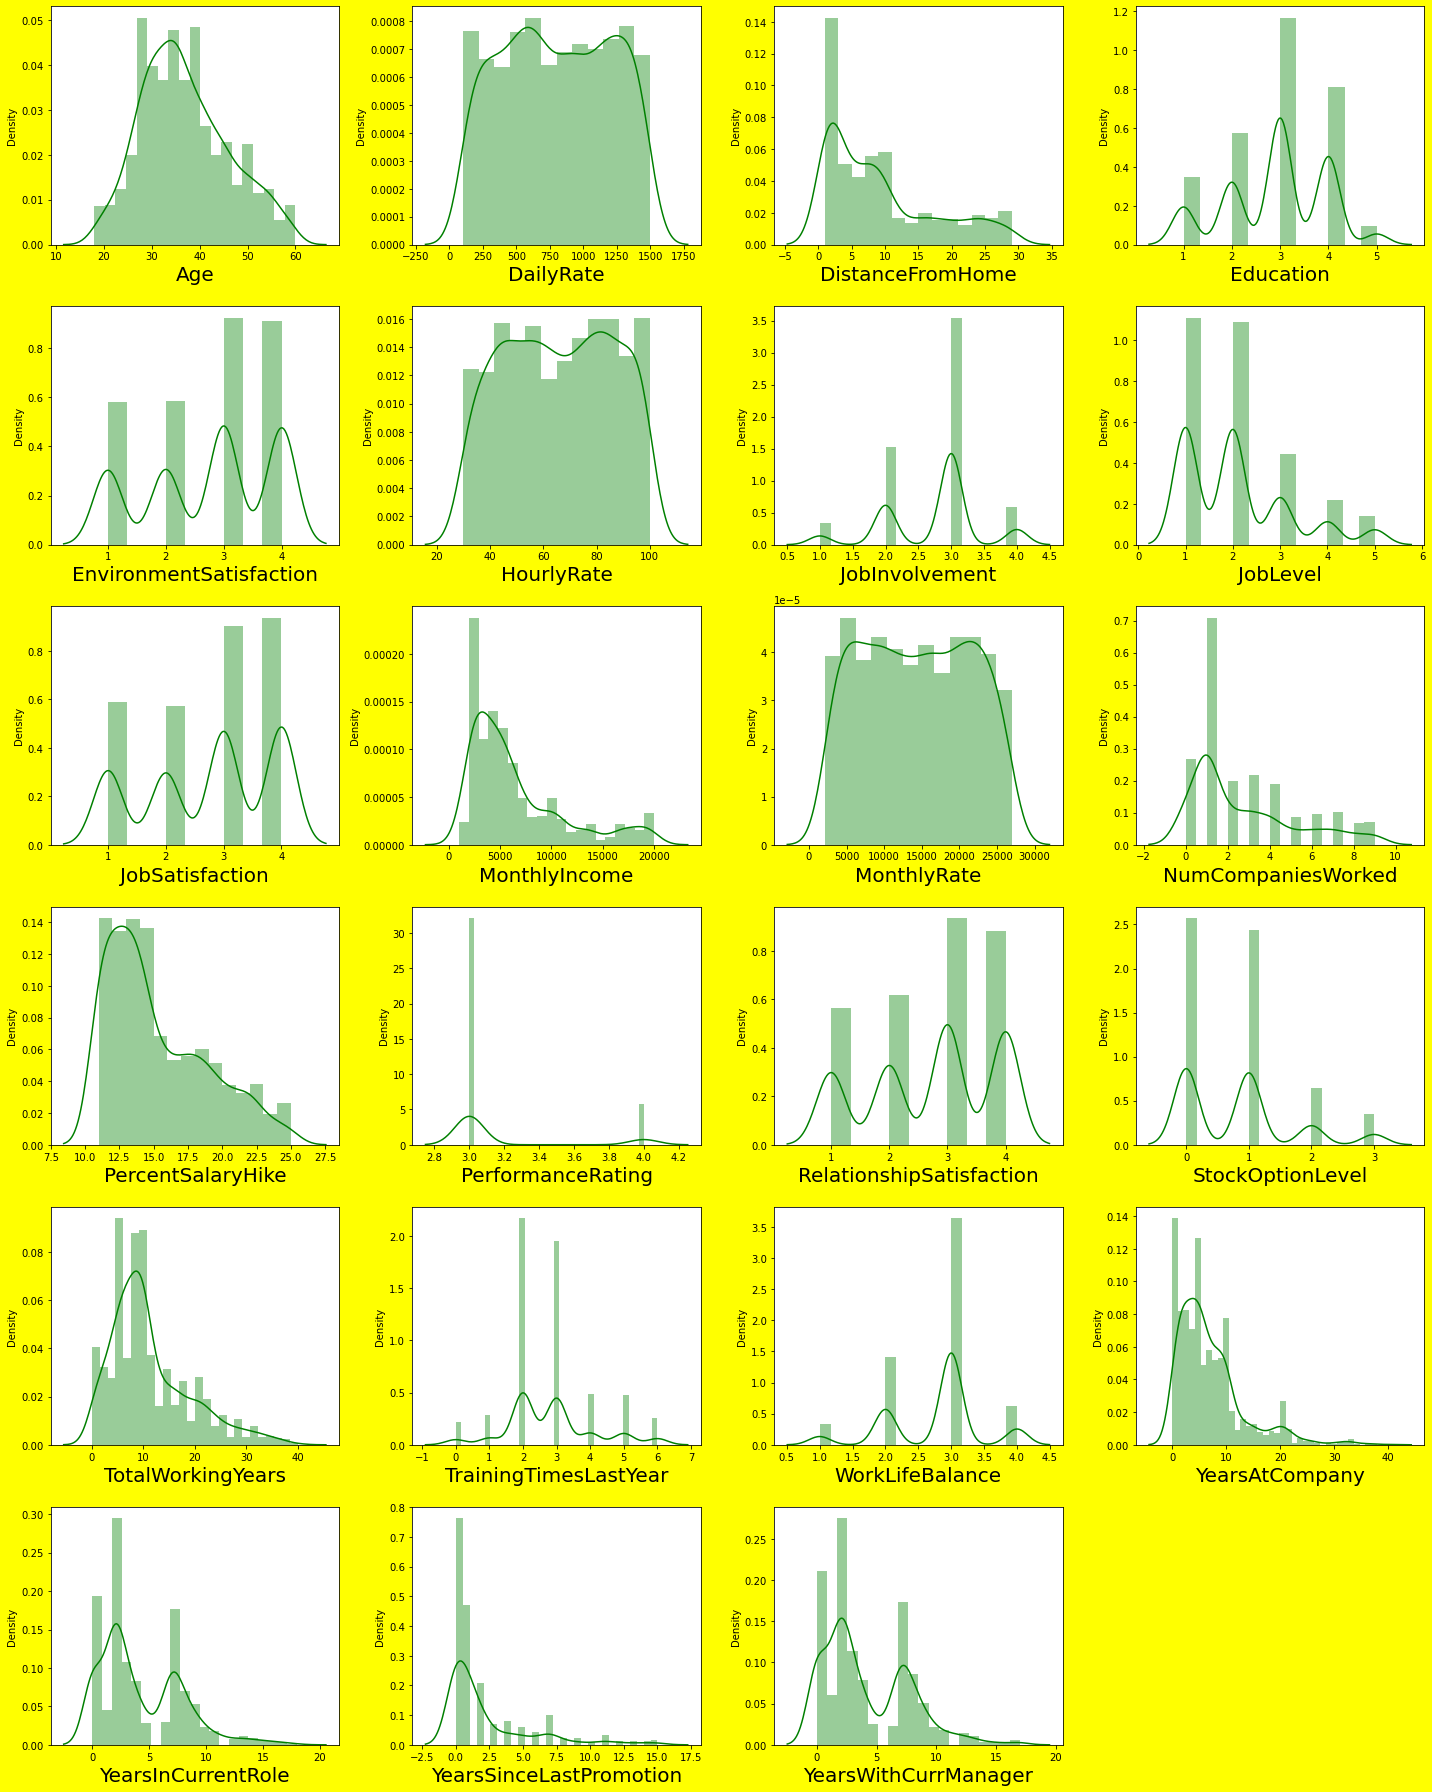

In [53]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(hr_data[column],color="g")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution plot we can infer that the Age column seems to be normal and there is no skewness in this column.

The columns DailyRate, HourlyRate and MonthlyRate are almost normally distributed and these columns have no skewness.

Apart from the above mentioned columns, none of the columns are normally distributed and all of them are skewed. We will remove these skewness later.

## skewness Removable:

In [54]:
#checking skewness
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [55]:
# Removing skewness using yeo-johnson  method to get better prediction
skew_data = ['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
scaler = PowerTransformer(method='yeo-johnson')
new_df[skew_data] = scaler.fit_transform(new_df[skew_data].values)
new_df[skew_data].head()

,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.489968,0.349828,0.386674,1.620671,-1.495549,-1.084263,-0.173231,-2.608524,0.231837,0.290524,-1.073534,0.582177
1,0.244561,0.349828,0.144235,-0.561880,1.690425,0.548653,0.147620,0.217074,0.948319,1.006575,0.193168,1.018073
2,-1.028366,-1.141761,-1.431153,1.273711,0.193797,-1.084263,-0.351153,0.217074,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.698191,-1.141761,-0.814425,-0.561880,-1.495549,-1.084263,-0.173231,0.217074,0.621429,1.006575,1.027520,-1.528426
4,-1.028366,-1.141761,-0.504453,1.764103,-0.957525,0.548653,-0.544046,0.217074,-0.933983,-0.390769,0.722874,-0.347871


In [58]:
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

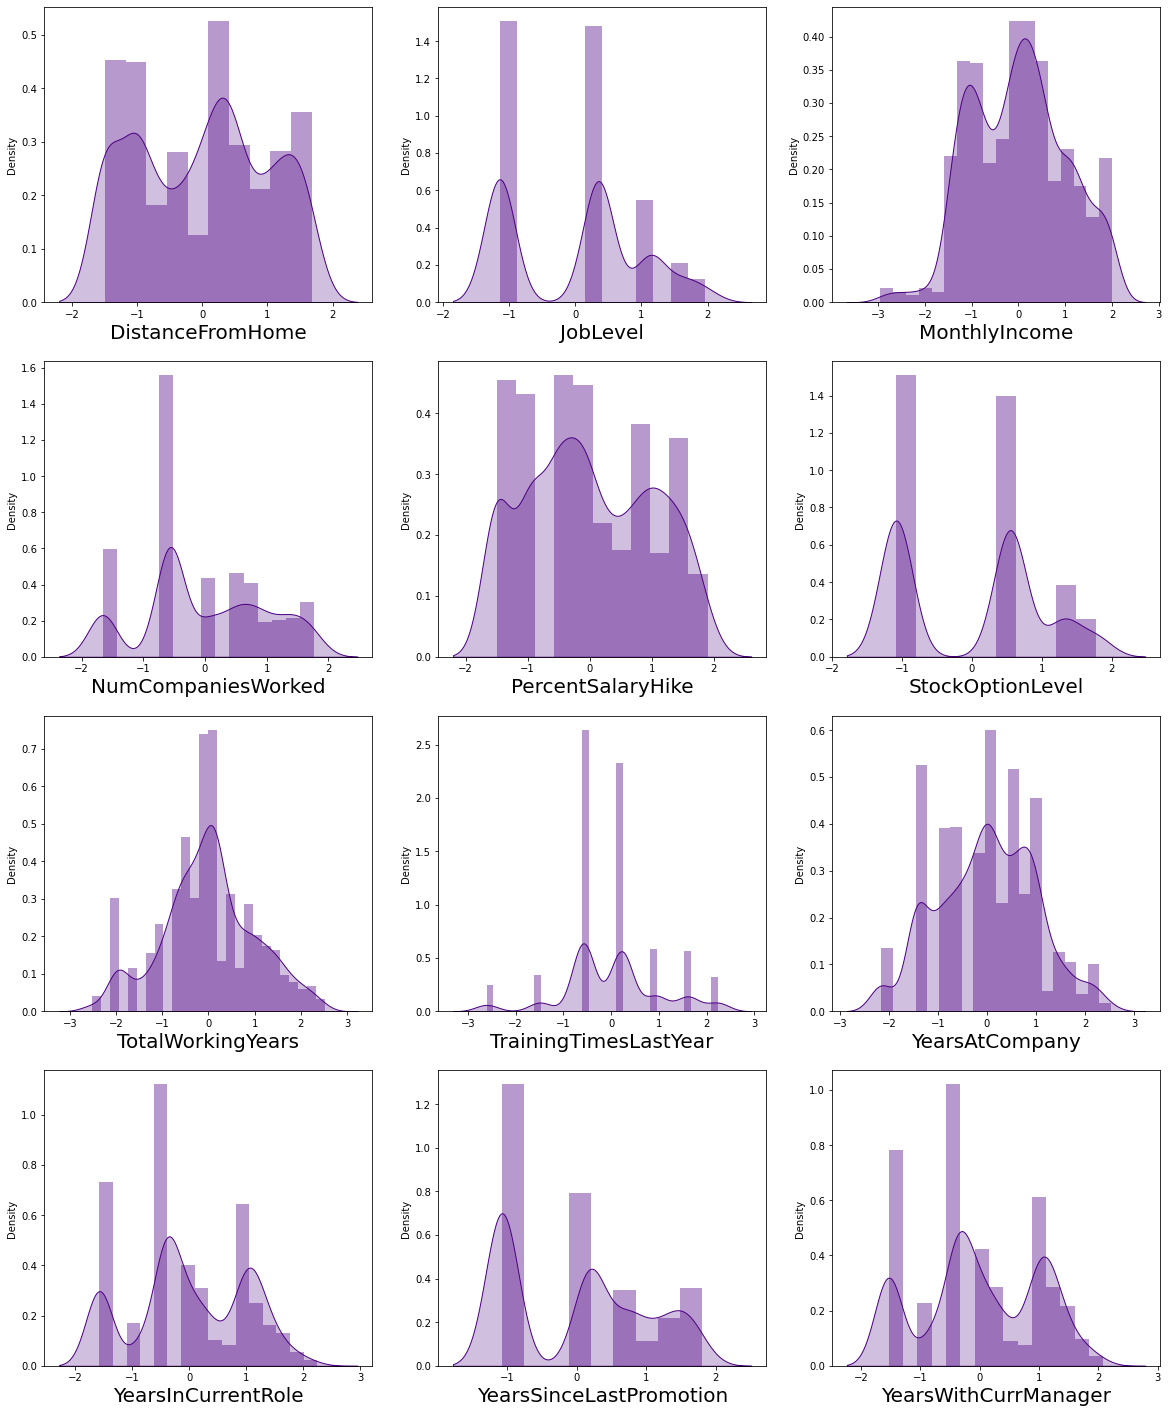

In [59]:
#let us plot again
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew_data]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Encoding the categorical columns using Label Encoding

In [60]:
categorical_col =['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


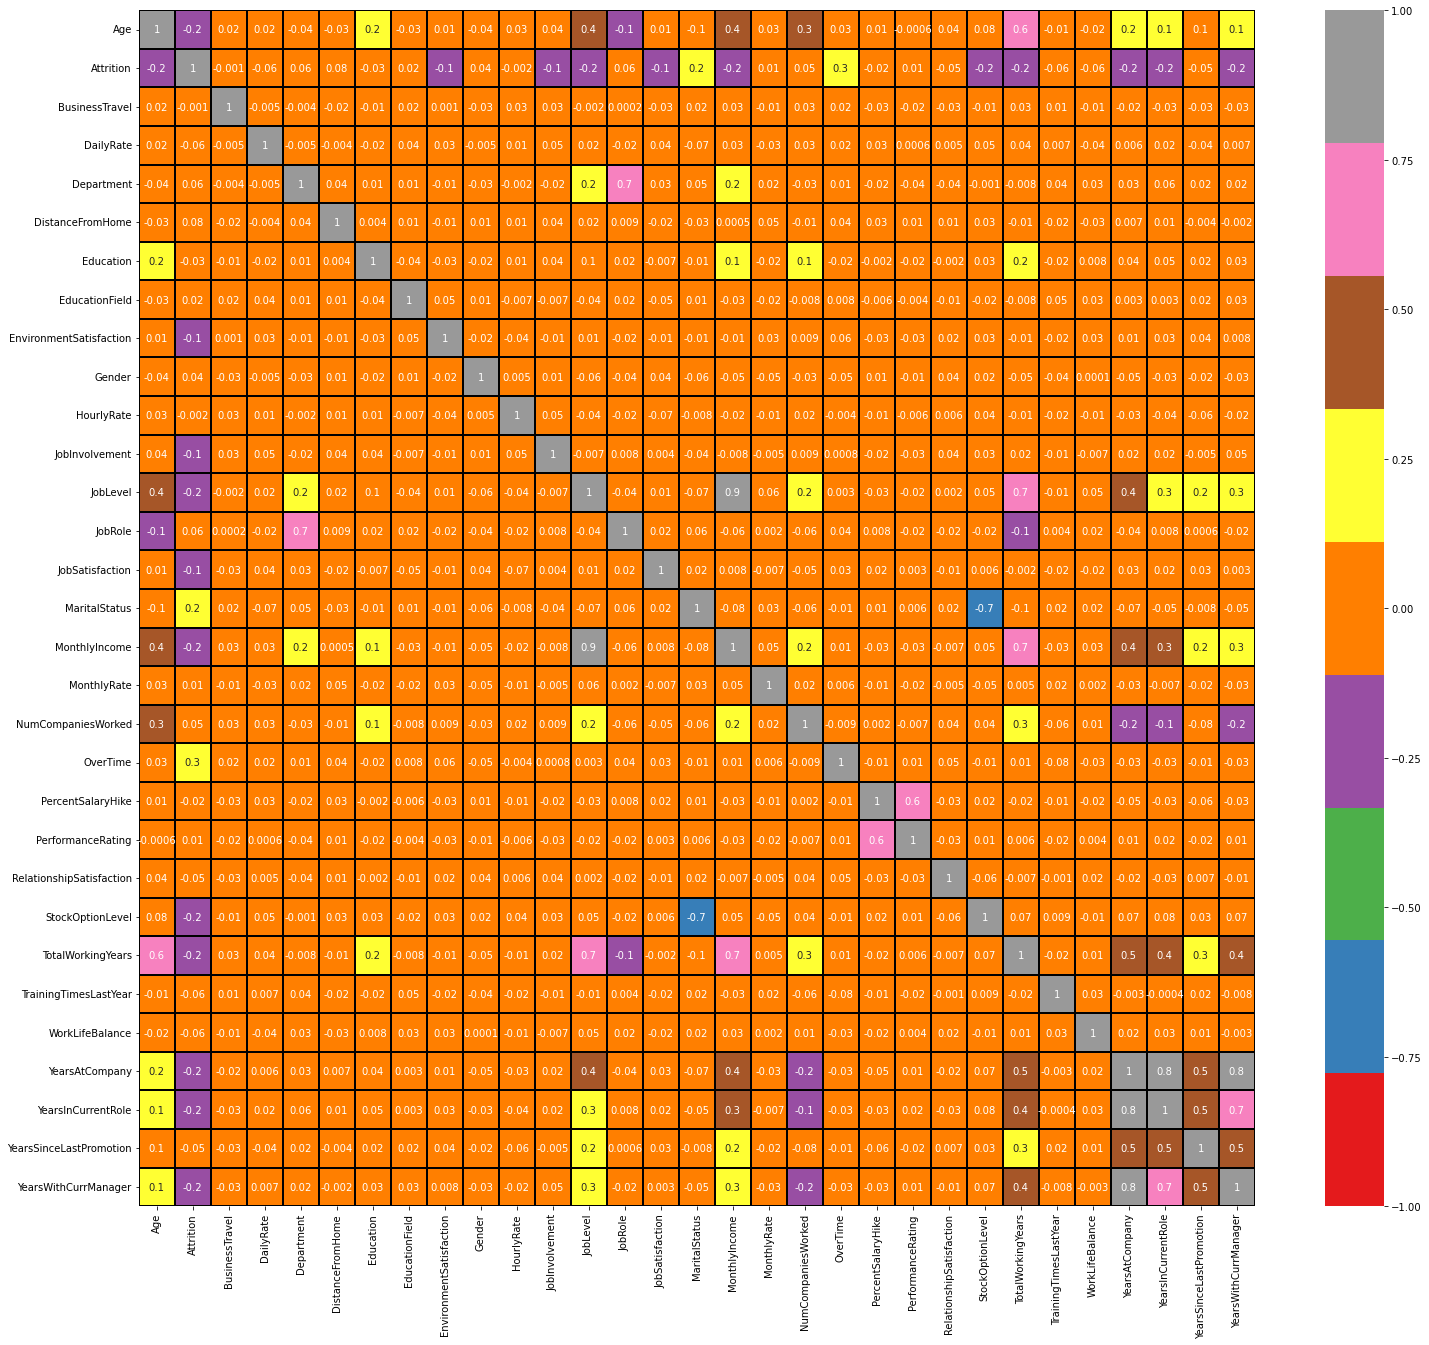

In [61]:
# Correlation between the target variable and independent variables using HEAT map after encoding
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="Set1")
plt.yticks(rotation=0);

# Visualizing the correlation between label and features using bar plot:

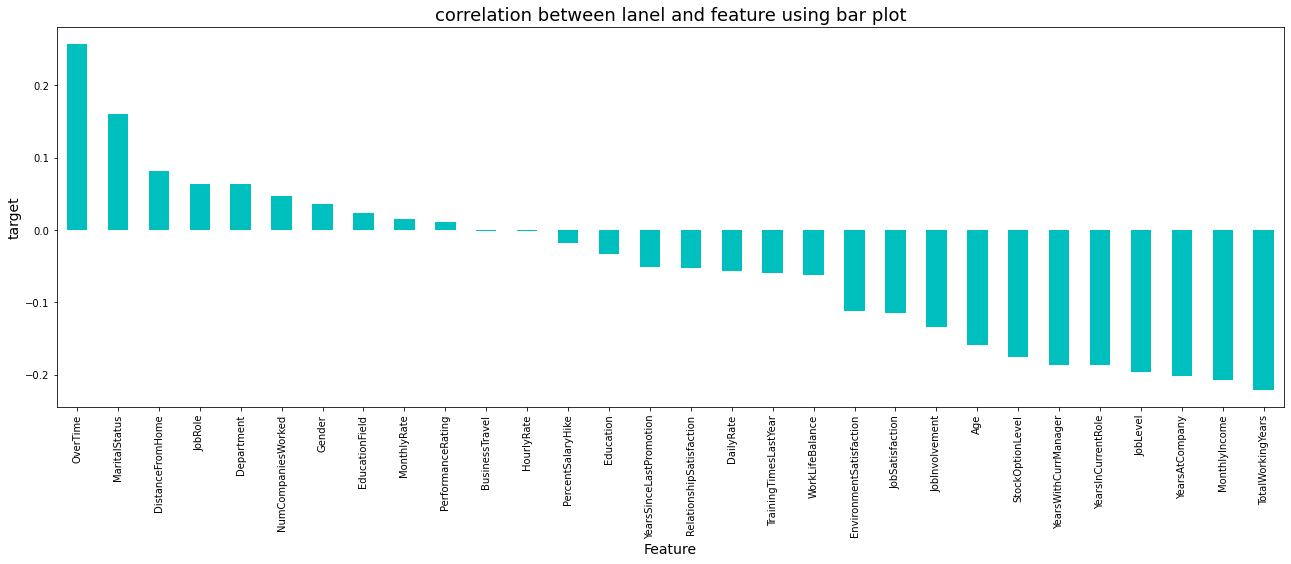

In [62]:
plt.figure(figsize=(22,7))
new_df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

## we can observe that Business travel and Hourly rate does not have much relation between our label let us plot the graph

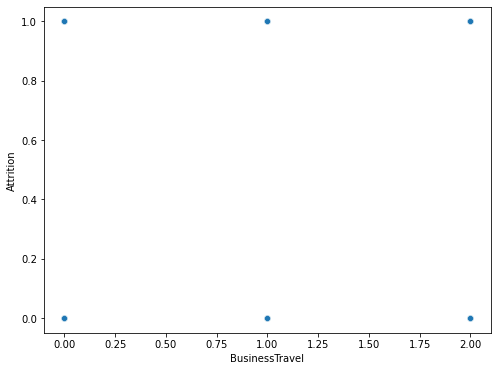

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BusinessTravel',y='Attrition',data=new_df)

plt.show()

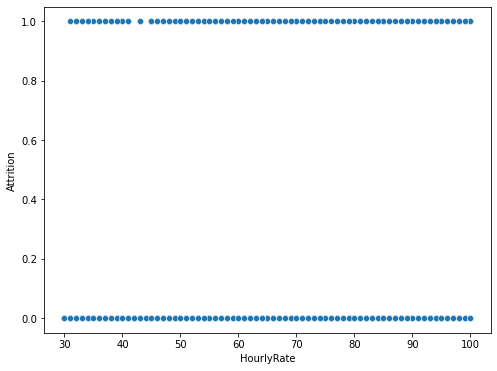

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='HourlyRate',y='Attrition',data=new_df)
plt.show()

* we can notice no realation or these features will not effect the attrition, So let us drop thease coloumns

In [65]:
# Dropping irrelevant columns
new_df.drop("BusinessTravel",axis=1, inplace=True)
new_df.drop("HourlyRate",axis=1, inplace=True)
# Seperating lable an features
x=new_df.drop('Attrition',axis=1)
y=new_df['Attrition']
print(x.shape)
print(y.shape)

(1387, 28)
(1387,)


## Oversampling

In [67]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

# Feature Scaling using Standard Scalarization:

In [68]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.716718,0.830771,1.598951,-1.664221,-0.739687,-0.914264,-0.443020,-1.038747,0.642539,0.560362,...,-0.336045,-1.448415,-0.987023,0.014386,-2.667833,-2.128805,0.410628,0.468620,-1.104729,0.772720
1,1.649912,-1.301518,-0.311870,0.181971,-1.766120,-0.914264,0.488045,0.962699,-0.720208,0.560362,...,2.975789,1.407313,0.733109,0.339910,0.301250,0.558746,1.153272,1.218777,0.241441,1.227718
2,0.250121,1.532898,-0.311870,-1.172903,-0.739687,1.474719,1.419110,0.962699,-0.720208,-1.025495,...,-0.336045,-0.496505,-0.987023,-0.166127,0.301250,0.558746,-2.064491,-1.482421,-1.104729,-1.430371
3,-0.216476,1.582125,-0.311870,-0.821472,1.313178,-0.914264,1.419110,-1.038747,0.642539,-1.025495,...,-0.336045,0.455404,-0.987023,0.014386,0.301250,0.558746,0.814446,1.218777,1.128138,-1.430371
4,-0.916372,-0.493165,-0.311870,-1.172903,-1.766120,0.678392,-1.374084,0.962699,0.642539,-1.025495,...,-0.336045,1.407313,0.733109,-0.361829,0.301250,0.558746,-0.797761,-0.245123,0.804379,-0.198083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,1.066666,1.188312,-0.311870,0.446440,-0.739687,-0.914264,-0.443020,-1.038747,-0.720208,1.292634,...,-0.336045,-0.496505,1.660718,0.905888,-0.536273,-0.785030,0.558799,0.892370,-1.104729,0.906521
2312,-0.566424,0.286688,1.598951,-0.058541,0.286745,-0.117936,-0.443020,-1.038747,-0.720208,-1.025495,...,-0.336045,-0.496505,-0.987023,-1.808225,0.301250,-0.785030,-1.301175,-1.482421,-1.104729,-1.430371
2313,-1.499618,1.017314,1.598951,0.134626,0.286745,-0.117936,-1.374084,-1.038747,-0.720208,-0.622110,...,-0.336045,0.455404,-0.987023,-1.480158,0.088214,0.558746,-1.074558,-0.695854,-0.338165,-0.616045
2314,0.716718,0.118281,-0.311870,1.167734,-0.739687,-0.914264,-1.374084,-1.038747,0.642539,0.012306,...,-0.336045,-0.496505,-0.987023,0.126884,-0.536273,0.558746,0.173736,0.468620,-0.223782,0.293846


# Checking multicolinearity using VIF:

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"] = x.columns
# Print vif values
vif

,VIF values,Features
0,1.956860,Age
1,1.042786,DailyRate
2,2.048935,Department
3,1.040701,DistanceFromHome
4,1.081598,Education
5,1.046196,EducationField
6,1.063951,EnvironmentSatisfaction
7,1.050231,Gender
8,1.088954,JobInvolvement
9,5.712201,JobLevel


## all values are less than 10 there is not that much muticolinearity.

# Building Machine Learning Models:

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8575539568345324  on Random_state  35


In [71]:
#Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# 1. Decision Tree Classifier

In [73]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8345323741007195
[[284  61]
 [ 54 296]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       345
           1       0.83      0.85      0.84       350

    accuracy                           0.83       695
   macro avg       0.83      0.83      0.83       695
weighted avg       0.83      0.83      0.83       695



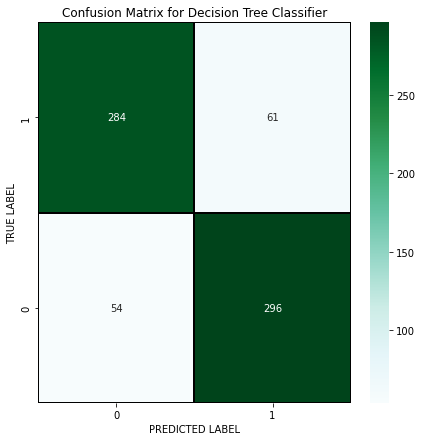

In [74]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# 2. Random Forest Classifier

In [75]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9223021582733812
[[332  13]
 [ 41 309]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       345
           1       0.96      0.88      0.92       350

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.93      0.92      0.92       695



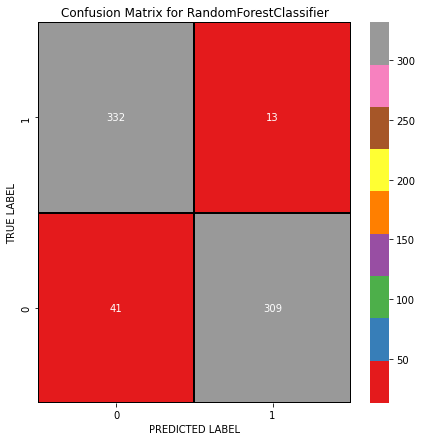

In [76]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set1",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# 3. Logistic Regression:

In [77]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8215827338129497
[[283  62]
 [ 62 288]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       345
           1       0.82      0.82      0.82       350

    accuracy                           0.82       695
   macro avg       0.82      0.82      0.82       695
weighted avg       0.82      0.82      0.82       695



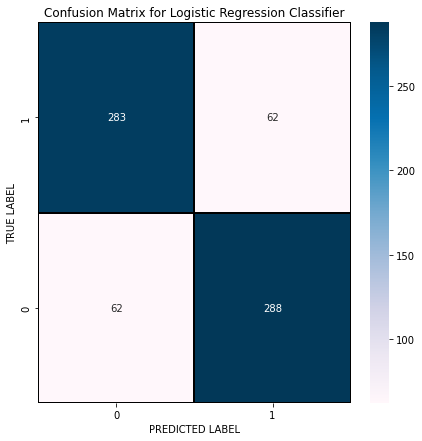

In [78]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Support Vector Machine Classifier:

In [79]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8776978417266187
[[301  44]
 [ 41 309]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       345
           1       0.88      0.88      0.88       350

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695



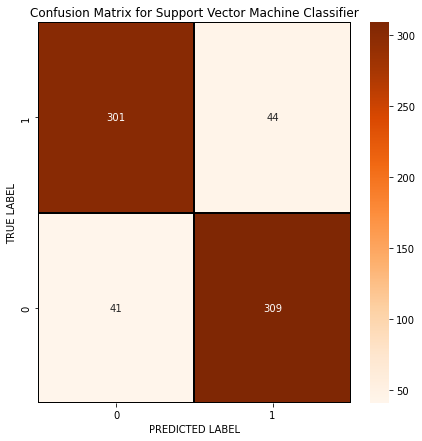

In [80]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Oranges",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# 4.KNeighbors Classifier

In [81]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8258992805755395
[[235 110]
 [ 11 339]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       345
           1       0.76      0.97      0.85       350

    accuracy                           0.83       695
   macro avg       0.86      0.82      0.82       695
weighted avg       0.85      0.83      0.82       695



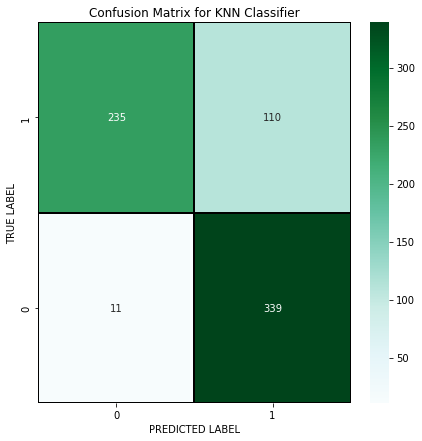

In [82]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# 5. Gradient Boosting Classifier:

In [83]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9151079136690647
[[333  12]
 [ 47 303]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       345
           1       0.96      0.87      0.91       350

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.91       695
weighted avg       0.92      0.92      0.91       695



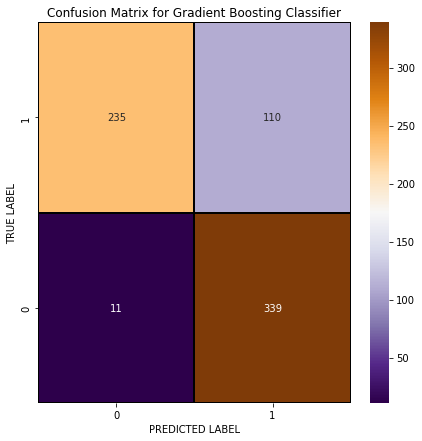

In [84]:
# Lets plot confusion matrix for gradient boosting classifier/:
x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuOr_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# 6.AdaBoost Classifier:

In [85]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.879136690647482
[[303  42]
 [ 42 308]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       345
           1       0.88      0.88      0.88       350

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695



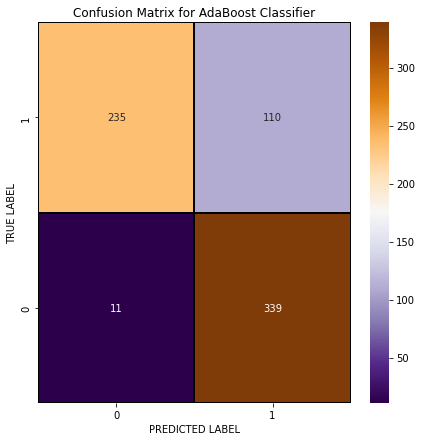

In [86]:
# Lets plot confusion matrix for AdaBoost Classifier
x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuOr_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

# Cross Validation Score:

In [87]:
from sklearn.model_selection import cross_val_score

# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.8191740522827139
0.8964930736575557
0.797555299024354
0.8640770462500932
0.8216867133387951
0.8762204885678111
0.8472713562225367


* There is least difference between cross Validation score and accuracy score for knn and Logistic regression , so we will use knn for hyperparmetr turning for better result

# Hyperparameter turning:

In [88]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'leaf_size':[10,100],
              'algorithm':['auto','ball_tree','kd_tree','brute']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [90]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}

In [91]:
model = KNN(algorithm='auto', leaf_size=10, n_neighbors=2, weights='uniform')
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.92805755395683


* The accuracy of the best model increased after tuning and giving 88.77% accuracy.

# Plotting ROC -AUC

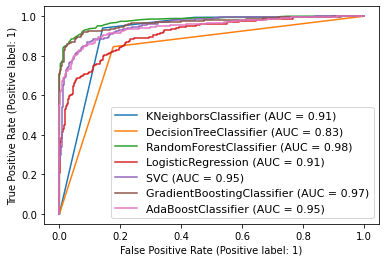

In [92]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(model,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the model:

In [93]:
import joblib
joblib.dump(model,"Attrition.pkl")

['Attrition.pkl']

# Predicting using model:

In [95]:
# Loading the saved model
model=joblib.load("Attrition.pkl")
#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [96]:
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,0,1
4,0,0
...,...,...
690,1,1
691,1,1
692,1,1
693,1,1


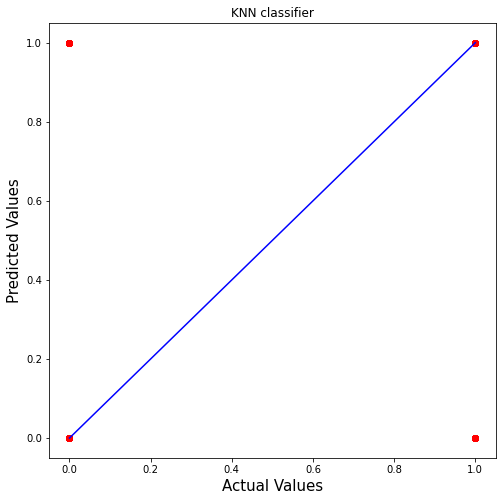

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("KNN classifier")
plt.show()

# --------------------------------------------------------------------------------------------------------------